Ordinary Least Sums Multiple Regression Modelling Code

OLS regression is a non-parametric version of multiple regression. Least Sums works off the basis of reducing the error variance in the sums of squares which increases drastically when data is not normally distributed. Essentially it takes the assumption of normality and throws it out of the window.



In [1]:
# Packages
import os
import pandas as pd
import numpy
import seaborn as sns
from scipy.stats.mstats import winsorize
import numpy as np
from scipy.stats import chi2
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# Set dir
os.getcwd()
os.chdir('/Users/[REDACTED]/Desktop/[REDACTED]')
os.getcwd()

'/Users/jackcrosby/Desktop/Sharon_Quinn'

In [1]:
# Import Dataset, display pandas to max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1 = pd.read_csv('[REDACTED].csv')
display(df1)

In [2]:
# Extract Relevant Variables
df2 = df1[['Level', 'Age', 'Gender', 'Approach', 'Belief', 'Consult', 'Control', 'Deliberation', 'Facts', 'Pace', 'Responsible', 'Risk', 'Thought']]
display(df2)

Univariate Outlier Analysis - I believe we decided to keep outliers in or something so this is simply for the pruposes of checking.  

<AxesSubplot:>

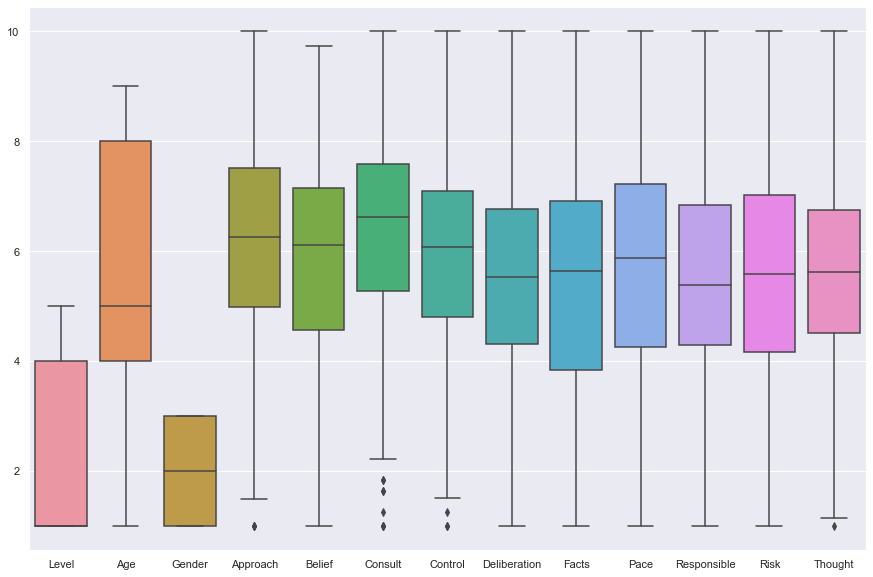

In [5]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.boxplot(data = df2)

There are some outliers but we'll leave these in.

Multivariate Outlier Analysis - These are usually quite rare. It's somewhat expected that they'll be in the dataset given the existence of univariate outliers. these are done using Mahalanobis Distance. If Mahalanobis distance has a p value of .001 then there are Multivariate Outliers

In [3]:
### Outliers Multivariate - Mahalanobis ###
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(df2)
    if not cov:
        cov = np.cov(df2.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df2['mahalanobis'] = mahalanobis(x=df2, data=df2)
display(df2)


In [4]:
df2['mahal_p'] = 1 - chi2.cdf(df2['mahalanobis'], 11) # Degrees of freedom is number of IVs -1 so 11
#display first five rows of dataframe
display(df2)

No Multivariate outliers identified at the p<.001 level.

Assessment of Normality: I know it's not going to be normal but it can be useful to see.

ShapiroResult(statistic=0.7426264882087708, pvalue=2.3505291867969064e-29)

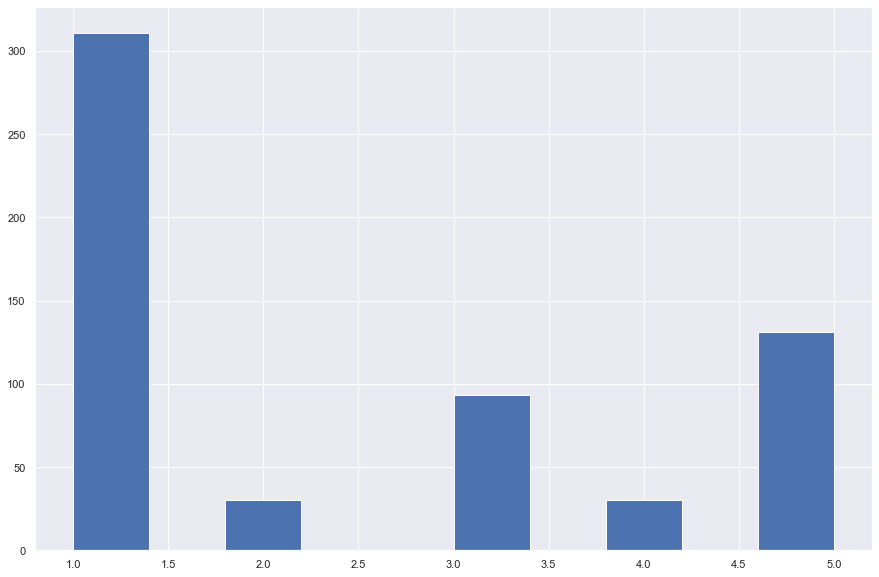

In [8]:
plt.hist(df2['Level'])
shapiro(df2['Level'])

ShapiroResult(statistic=0.8586779832839966, pvalue=1.0678893377688428e-22)

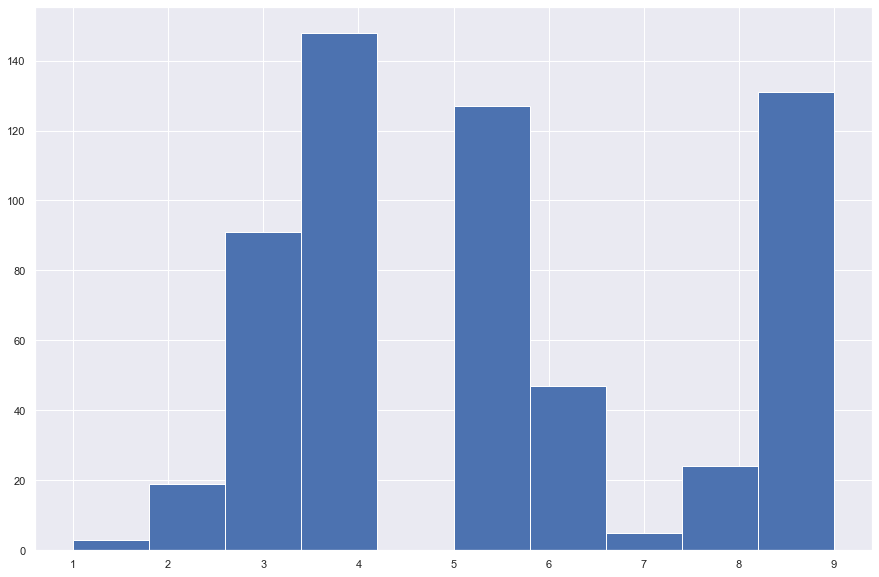

In [9]:
plt.hist(df2['Age'])
shapiro(df2['Age'])

ShapiroResult(statistic=0.9921382069587708, pvalue=0.003105752170085907)

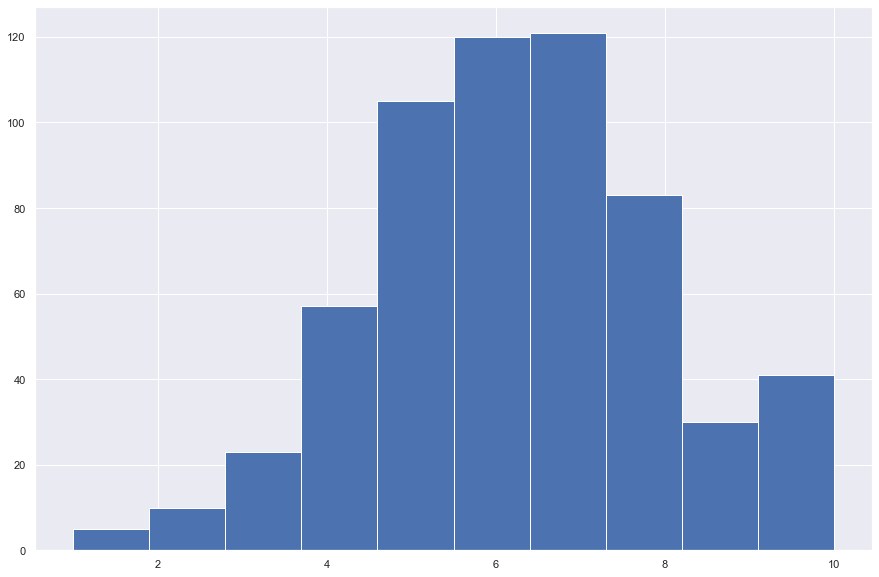

In [11]:
plt.hist(df2['Approach'])
shapiro(df2['Approach'])

ShapiroResult(statistic=0.9704980850219727, pvalue=1.4247948376677755e-09)

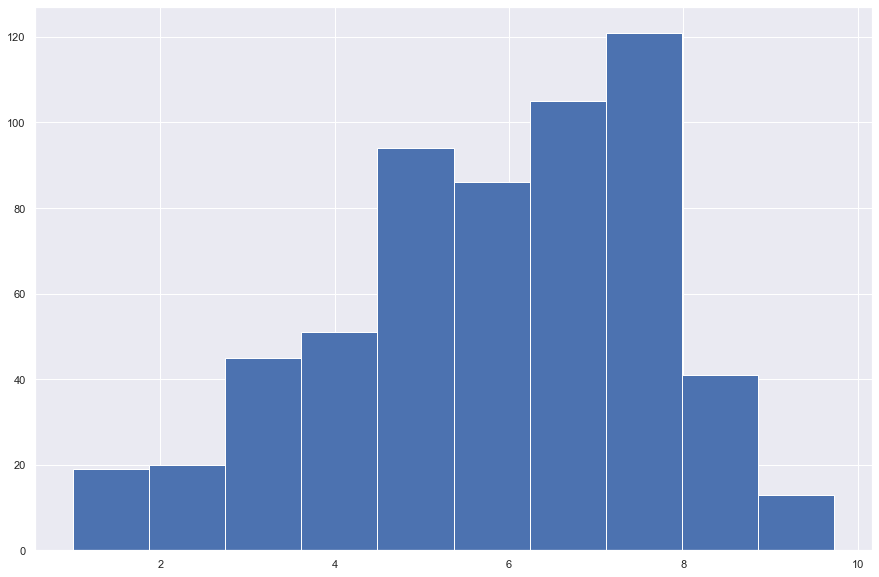

In [12]:
plt.hist(df2['Belief'])
shapiro(df2['Belief'])

ShapiroResult(statistic=0.9813235998153687, pvalue=6.742425284755882e-07)

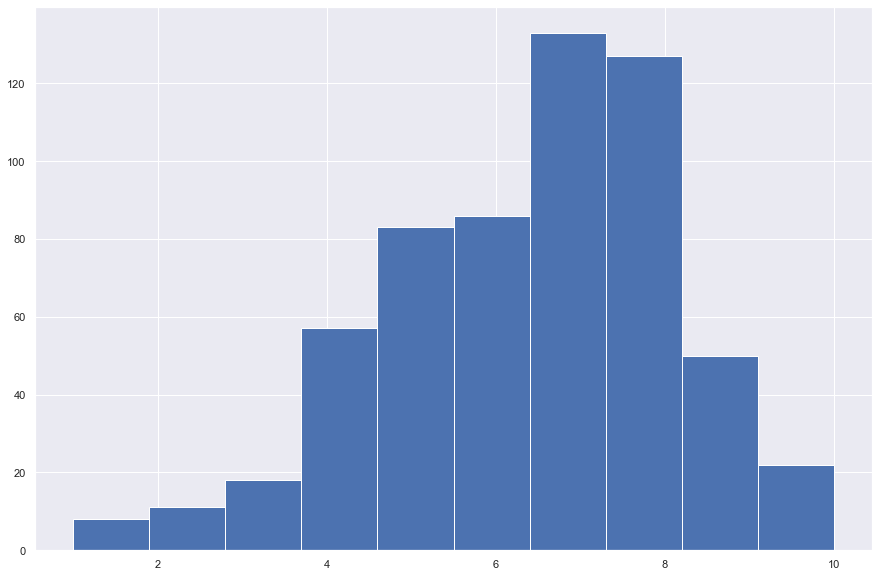

In [13]:
plt.hist(df2['Consult'])
shapiro(df2['Consult'])

ShapiroResult(statistic=0.9909512400627136, pvalue=0.001045365585014224)

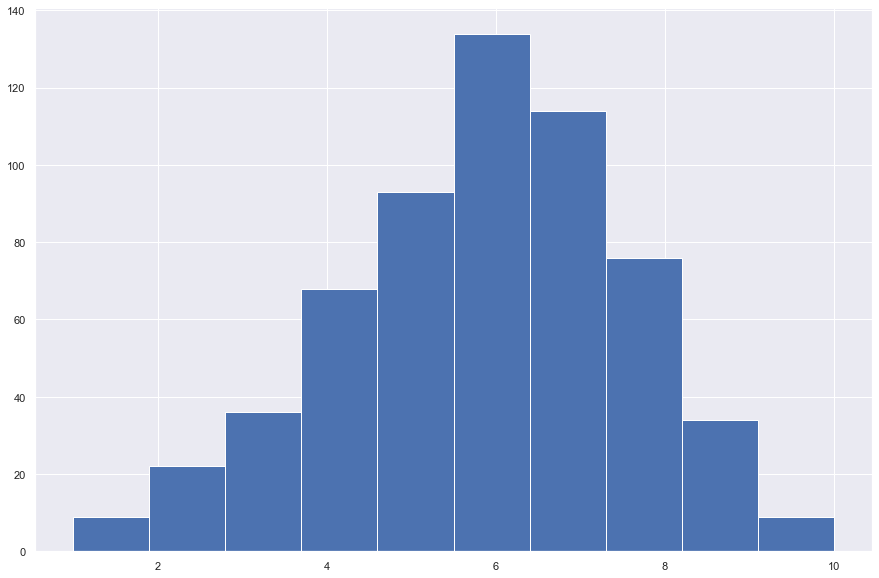

In [14]:
plt.hist(df2[['Control']])
shapiro(df2[['Control']])

ShapiroResult(statistic=0.9948843121528625, pvalue=0.04499543458223343)

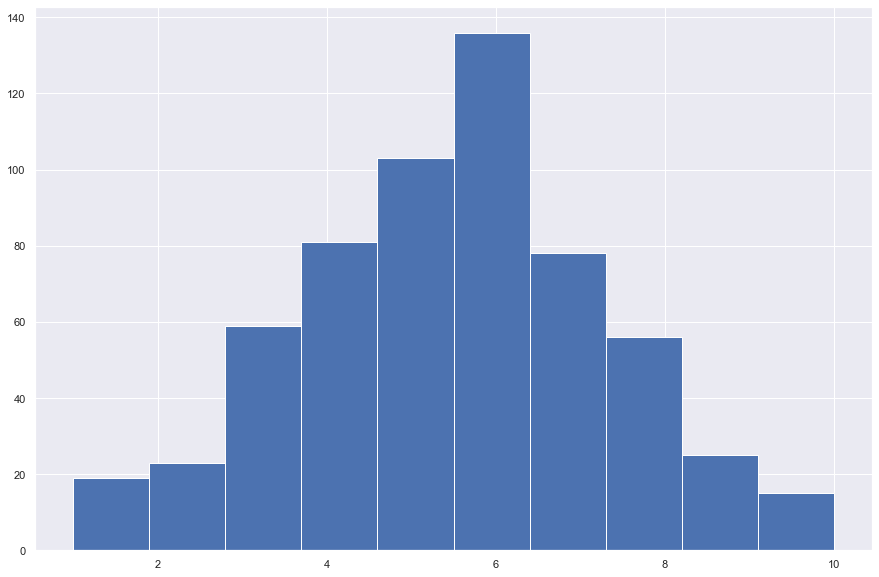

In [15]:
plt.hist(df2[['Deliberation']])
shapiro(df2[['Deliberation']])

ShapiroResult(statistic=0.9864023923873901, pvalue=2.4156106519512832e-05)

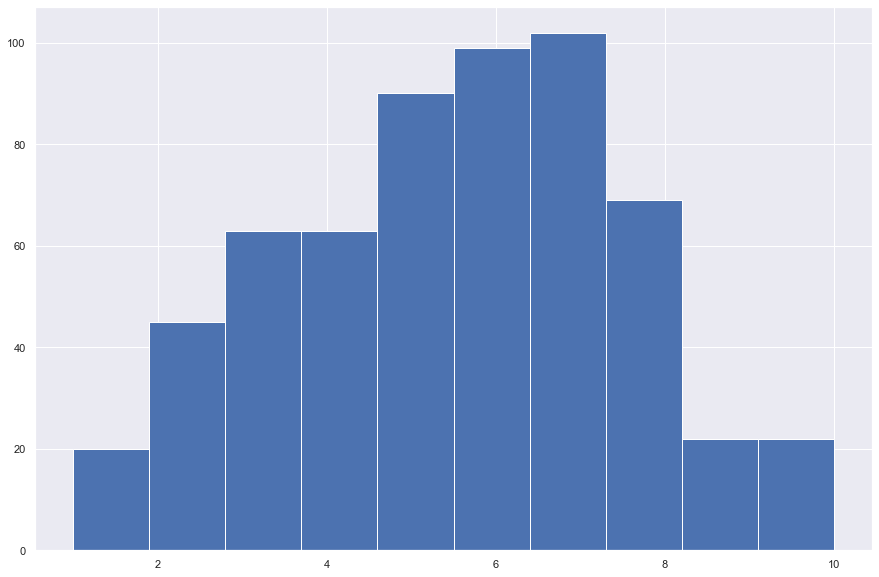

In [16]:
plt.hist(df2[['Facts']])
shapiro(df2[['Facts']])

ShapiroResult(statistic=0.9852171540260315, pvalue=9.945943020284176e-06)

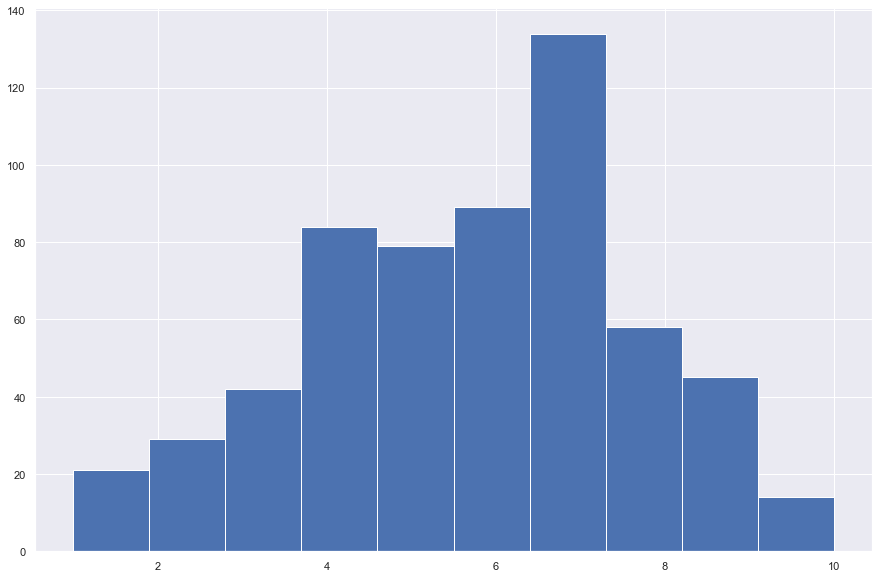

In [17]:
plt.hist(df2[['Pace']])
shapiro(df2[['Pace']])

ShapiroResult(statistic=0.9898632168769836, pvalue=0.00040102057391777635)

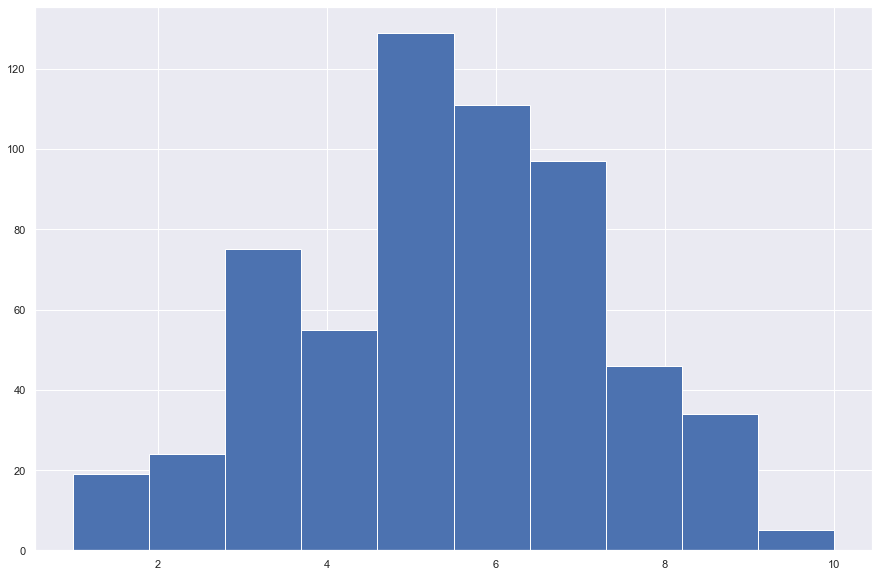

In [18]:
plt.hist(df2[['Responsible']])
shapiro(df2[['Responsible']])

ShapiroResult(statistic=0.9886574745178223, pvalue=0.00014483595441561192)

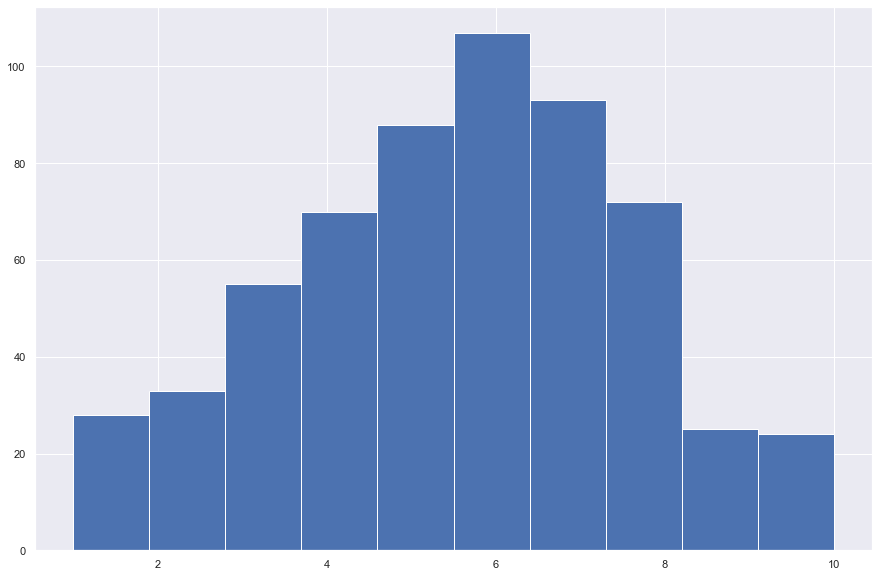

In [19]:
plt.hist(df2[['Risk']])
shapiro(df2[['Risk']])

ShapiroResult(statistic=0.9910589456558228, pvalue=0.0011517588282003999)

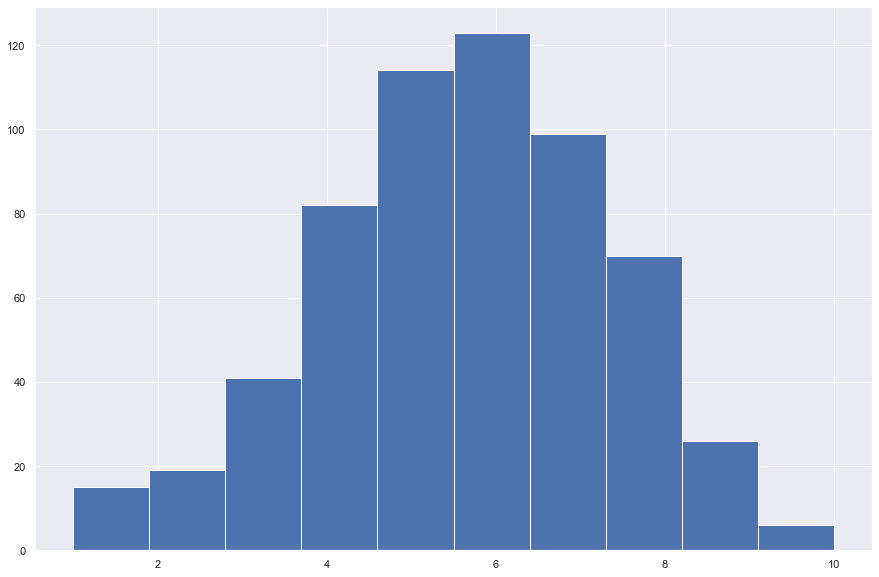

In [20]:
plt.hist(df2[['Thought']])
shapiro(df2[['Thought']])

Confirms Non-normality so we can run the non-parametric stuff

In [21]:
df2.corr(min_periods = 2)

,Level,Age,Gender,Approach,Belief,Consult,Control,Deliberation,Facts,Pace,Responsible,Risk,Thought,mahalanobis,mahal_p
Level,1.000000,0.737655,0.564689,0.073196,0.256108,0.181490,0.128679,-0.013449,-0.091731,0.182104,0.116055,0.179146,-0.068958,0.131492,-0.148468
Age,0.737655,1.000000,0.657971,0.082408,0.229531,0.133105,0.155325,0.017362,-0.153403,0.133635,0.139623,0.163319,-0.071504,0.044888,-0.096903
Gender,0.564689,0.657971,1.000000,-0.045432,0.057664,0.080706,0.053894,0.054747,0.012435,0.018864,-0.035592,0.077427,0.005637,0.021605,0.030661
Approach,0.073196,0.082408,-0.045432,1.000000,0.066975,0.320826,0.273844,0.154545,-0.352288,0.261917,0.249562,0.243712,-0.151354,-0.087554,-0.008883
Belief,0.256108,0.229531,0.057664,0.066975,1.000000,-0.140886,0.442587,-0.261323,-0.237152,0.346756,0.514433,0.239265,-0.115738,0.000903,-0.085966
Consult,0.181490,0.133105,0.080706,0.320826,-0.140886,1.000000,-0.024599,-0.003239,0.009887,-0.019660,-0.172769,-0.064029,0.133833,-0.085191,-0.021012
Control,0.128679,0.155325,0.053894,0.273844,0.442587,-0.024599,1.000000,0.066941,-0.251122,0.384689,0.421293,0.349701,-0.123356,-0.009328,-0.018306
Deliberation,-0.013449,0.017362,0.054747,0.154545,-0.261323,-0.003239,0.066941,1.000000,-0.296129,0.302419,0.070442,0.499120,-0.259145,0.000370,-0.005373
Facts,-0.091731,-0.153403,0.012435,-0.352288,-0.237152,0.009887,-0.251122,-0.296129,1.000000,-0.576500,-0.481556,-0.373108,0.611872,0.073260,-0.036257
Pace,0.182104,0.133635,0.018864,0.261917,0.346756,-0.019660,0.384689,0.302419,-0.576500,1.000000,0.544384,0.484755,-0.488689,-0.016496,0.000084


In [22]:
# Calculate p values 
spearmanr(df2['Level'], df2['Age'])

SpearmanrResult(correlation=0.6048126825718252, pvalue=1.2381136480706442e-60)

In [23]:
spearmanr(df2['Level'], df2['Gender'])

SpearmanrResult(correlation=0.4979693027790321, pvalue=1.315166804350944e-38)

In [24]:
spearmanr(df2['Level'], df2['Approach'])

SpearmanrResult(correlation=0.09809184779725116, pvalue=0.016690287747377273)

In [25]:
spearmanr(df2['Level'], df2['Belief'])

SpearmanrResult(correlation=0.27635534669976913, pvalue=6.842119825461605e-12)

In [26]:
spearmanr(df2['Level'], df2['Consult'])

SpearmanrResult(correlation=0.2048565119653737, pvalue=4.6546669965545034e-07)

In [27]:
spearmanr(df2['Level'], df2['Control'])

SpearmanrResult(correlation=0.1399982229699957, pvalue=0.0006156551396226093)

In [28]:
spearmanr(df2['Level'], df2['Deliberation'])

SpearmanrResult(correlation=-0.015610990339212547, pvalue=0.7039339971956022)

In [29]:
spearmanr(df2['Level'], df2['Facts'])

SpearmanrResult(correlation=-0.08981278788262881, pvalue=0.028481400799812456)

In [30]:
spearmanr(df2['Level'], df2['Pace'])

SpearmanrResult(correlation=0.1866898823960742, pvalue=4.547555239995551e-06)

In [31]:
spearmanr(df2['Level'], df2['Responsible'])

SpearmanrResult(correlation=0.1182290980939521, pvalue=0.003877144100155679)

In [32]:
spearmanr(df2['Level'], df2['Risk'])

SpearmanrResult(correlation=0.17011093993637433, pvalue=3.030462459296075e-05)

In [33]:
spearmanr(df2['Level'], df2['Thought'])

SpearmanrResult(correlation=-0.06414790035114307, pvalue=0.11803961923012132)

In [34]:
spearmanr(df2['Age'], df2['Gender'])

SpearmanrResult(correlation=0.5505979014867323, pvalue=1.828308651481184e-48)

In [35]:
spearmanr(df2['Age'], df2['Approach'])

SpearmanrResult(correlation=0.10476595657945423, pvalue=0.010552372824580656)

In [36]:
spearmanr(df2['Age'], df2['Belief'])

SpearmanrResult(correlation=0.23108952347601228, pvalue=1.181407040897871e-08)

In [37]:
spearmanr(df2['Age'], df2['Consult'])

SpearmanrResult(correlation=0.13704307483205233, pvalue=0.0008033550062734019)

In [38]:
spearmanr(df2['Age'], df2['Control'])

SpearmanrResult(correlation=0.17616304330867485, pvalue=1.5470082945654345e-05)

In [39]:
spearmanr(df2['Age'], df2['Deliberation'])

SpearmanrResult(correlation=0.011524316275671836, pvalue=0.7790736207831607)

In [40]:
spearmanr(df2['Age'], df2['Facts'])

SpearmanrResult(correlation=-0.1815832456879858, pvalue=8.308268111112309e-06)

In [41]:
spearmanr(df2['Age'], df2['Pace'])

SpearmanrResult(correlation=0.1276436332865972, pvalue=0.0018098262675282138)

In [42]:
spearmanr(df2['Age'], df2['Responsible'])

SpearmanrResult(correlation=0.15081133754789194, pvalue=0.00022242281436200543)

In [43]:
spearmanr(df2['Age'], df2['Risk'])

SpearmanrResult(correlation=0.1403029315229621, pvalue=0.0005988154615905742)

In [44]:
spearmanr(df2['Age'], df2['Thought'])

SpearmanrResult(correlation=-0.07176897139095104, pvalue=0.08025504124747677)

In [45]:
spearmanr(df2['Gender'], df2['Approach'])

SpearmanrResult(correlation=-0.0410213495556836, pvalue=0.3178263748004617)

In [46]:
spearmanr(df2['Gender'], df2['Belief'])

SpearmanrResult(correlation=0.05832505203052151, pvalue=0.15534031663886175)

In [47]:
spearmanr(df2['Gender'], df2['Consult'])

SpearmanrResult(correlation=0.09164406753153943, pvalue=0.025388206536165057)

In [48]:
spearmanr(df2['Gender'], df2['Control'])

SpearmanrResult(correlation=0.0649558089568116, pvalue=0.11347106119587605)

In [49]:
spearmanr(df2['Gender'], df2['Deliberation'])

SpearmanrResult(correlation=0.0576723733515558, pvalue=0.16002374699836516)

In [50]:
spearmanr(df2['Gender'], df2['Facts'])

SpearmanrResult(correlation=0.00782289195808439, pvalue=0.8489780781302323)

In [51]:
spearmanr(df2['Gender'], df2['Pace'])

SpearmanrResult(correlation=0.020150451206593343, pvalue=0.6237528691034465)

In [52]:
spearmanr(df2['Gender'], df2['Responsible'])

SpearmanrResult(correlation=-0.03276387547124815, pvalue=0.4250269605607615)

In [53]:
spearmanr(df2['Gender'], df2['Risk'])

SpearmanrResult(correlation=0.08200606304257294, pvalue=0.045553722906637124)

In [54]:
spearmanr(df2['Gender'], df2['Thought'])

SpearmanrResult(correlation=-0.00589400156528921, pvalue=0.8859197394973322)

In [55]:
spearmanr(df2['Approach'], df2['Belief'])

SpearmanrResult(correlation=0.05699328584302597, pvalue=0.16500890724811137)

In [56]:
spearmanr(df2['Approach'], df2['Consult'])

SpearmanrResult(correlation=0.3077245954782612, pvalue=1.6222722025794374e-14)

In [57]:
spearmanr(df2['Approach'], df2['Control'])

SpearmanrResult(correlation=0.26298500092014904, pvalue=7.198964004778328e-11)

In [58]:
spearmanr(df2['Approach'], df2['Deliberation'])

SpearmanrResult(correlation=0.1427505559274042, pvalue=0.00047827001759631355)

In [59]:
spearmanr(df2['Approach'], df2['Facts'])

SpearmanrResult(correlation=-0.3517090234237267, pvalue=9.134634166356439e-19)

In [60]:
spearmanr(df2['Approach'], df2['Pace'])

SpearmanrResult(correlation=0.26578970879358227, pvalue=4.441599637984956e-11)

In [61]:
spearmanr(df2['Approach'], df2['Responsible'])

SpearmanrResult(correlation=0.236846756879102, pvalue=4.957840889829386e-09)

In [62]:
spearmanr(df2['Approach'], df2['Risk'])

SpearmanrResult(correlation=0.2463724531852883, pvalue=1.1208835174377765e-09)

In [63]:
spearmanr(df2['Approach'], df2['Thought'])

SpearmanrResult(correlation=-0.15917902317380894, pvalue=9.638408546878338e-05)

In [64]:
spearmanr(df2['Belief'], df2['Consult'])

SpearmanrResult(correlation=-0.13965524113001657, pvalue=0.000635135260868188)

In [65]:
spearmanr(df2['Belief'], df2['Control'])

SpearmanrResult(correlation=0.4389976114636683, pvalue=2.007289751690737e-29)

In [66]:
spearmanr(df2['Belief'], df2['Deliberation'])

SpearmanrResult(correlation=-0.23959801290515695, pvalue=3.247816111904031e-09)

In [67]:
spearmanr(df2['Belief'], df2['Facts'])

SpearmanrResult(correlation=-0.21703880166806191, pvalue=8.948508734253373e-08)

In [68]:
spearmanr(df2['Belief'], df2['Pace'])

SpearmanrResult(correlation=0.3287306679390293, pvalue=1.8472320832017914e-16)

In [69]:
spearmanr(df2['Belief'], df2['Responsible'])

SpearmanrResult(correlation=0.5016079557305398, pvalue=3.101503393470595e-39)

In [70]:
spearmanr(df2['Belief'], df2['Risk'])

SpearmanrResult(correlation=0.2176716906006781, pvalue=8.191810675975505e-08)

In [71]:
spearmanr(df2['Belief'], df2['Thought'])

SpearmanrResult(correlation=-0.08994791640620517, pvalue=0.028242576652549346)

In [72]:
spearmanr(df2['Consult'], df2['Control'])

SpearmanrResult(correlation=-0.006515901609338662, pvalue=0.873978216384928)

In [73]:
spearmanr(df2['Consult'], df2['Deliberation'])

SpearmanrResult(correlation=0.014921195283672516, pvalue=0.7164391157264364)

In [74]:
spearmanr(df2['Consult'], df2['Facts'])

SpearmanrResult(correlation=0.00801816115634718, pvalue=0.8452553063554227)

In [75]:
spearmanr(df2['Consult'], df2['Pace'])

SpearmanrResult(correlation=-0.006821039098771699, pvalue=0.868129346402869)

In [76]:
spearmanr(df2['Consult'], df2['Responsible'])

SpearmanrResult(correlation=-0.1633783181983245, pvalue=6.233897181035677e-05)

In [77]:
spearmanr(df2['Consult'], df2['Risk'])

SpearmanrResult(correlation=-0.04353247951323035, pvalue=0.2890804852757056)

In [78]:
spearmanr(df2['Consult'], df2['Thought'])

SpearmanrResult(correlation=0.12219143553007664, pvalue=0.0028311871794972207)

In [79]:
spearmanr(df2['Control'], df2['Deliberation'])

SpearmanrResult(correlation=0.07854094147230153, pvalue=0.055524473871733704)

In [80]:
spearmanr(df2['Control'], df2['Facts'])

SpearmanrResult(correlation=-0.2489487728444435, pvalue=7.416579348376972e-10)

In [81]:
spearmanr(df2['Control'], df2['Pace'])

SpearmanrResult(correlation=0.3955942590120206, pvalue=9.980444391031301e-24)

In [82]:
spearmanr(df2['Control'], df2['Responsible'])

SpearmanrResult(correlation=0.41868731271070314, pvalue=1.1799927040778847e-26)

In [83]:
spearmanr(df2['Control'], df2['Risk'])

SpearmanrResult(correlation=0.36090528161548024, pvalue=9.619538134124613e-20)

In [84]:
spearmanr(df2['Control'], df2['Thought'])
#Level, Age, Gender, Approach, Belief, Consult, Control, Deliberation, Facts, Pace, Responsible, Risk, Thought

SpearmanrResult(correlation=-0.1058395625542239, pvalue=0.009779342293497723)

In [85]:
spearmanr(df2['Deliberation'], df2['Facts'])

SpearmanrResult(correlation=-0.2926546085578297, pvalue=3.2487165912053534e-13)

In [86]:
spearmanr(df2['Deliberation'], df2['Pace'])

SpearmanrResult(correlation=0.30828018017065356, pvalue=1.447695306658972e-14)

In [87]:
spearmanr(df2['Deliberation'], df2['Responsible'])

SpearmanrResult(correlation=0.06285788013473413, pvalue=0.12563128922908606)

In [88]:
spearmanr(df2['Deliberation'], df2['Risk'])

SpearmanrResult(correlation=0.49850889289764366, pvalue=1.0627130570244961e-38)

In [89]:
spearmanr(df2['Deliberation'], df2['Thought'])

SpearmanrResult(correlation=-0.264396093723874, pvalue=5.6501378747908824e-11)

In [90]:
spearmanr(df2['Facts'], df2['Pace'])

SpearmanrResult(correlation=-0.5698773395232201, pvalue=1.5568747308207219e-52)

In [91]:
spearmanr(df2['Facts'], df2['Responsible'])

SpearmanrResult(correlation=-0.47225505439361726, pvalue=2.2093382056479347e-34)

In [92]:
spearmanr(df2['Facts'], df2['Risk'])

SpearmanrResult(correlation=-0.37510697265842813, pvalue=2.5696667635023804e-21)

In [93]:
spearmanr(df2['Facts'], df2['Thought'])

SpearmanrResult(correlation=0.5981276930801213, pvalue=5.248724559636752e-59)

In [94]:
spearmanr(df2['Pace'], df2['Responsible'])

SpearmanrResult(correlation=0.5122415224781004, pvalue=4.1127389631788597e-41)

In [95]:
spearmanr(df2['Pace'], df2['Risk'])

SpearmanrResult(correlation=0.4803010172332499, pvalue=1.1495548621889032e-35)

In [96]:
spearmanr(df2['Pace'], df2['Thought'])

SpearmanrResult(correlation=-0.4702946111672928, pvalue=4.486602434948475e-34)

In [97]:
spearmanr(df2['Responsible'], df2['Risk'])

SpearmanrResult(correlation=0.3713711785808682, pvalue=6.781753157758039e-21)

In [98]:
spearmanr(df2['Responsible'], df2['Thought'])

SpearmanrResult(correlation=-0.3985767228224291, pvalue=4.303887264247872e-24)

In [99]:
spearmanr(df2['Risk'], df2['Thought'])

SpearmanrResult(correlation=-0.2189266574496746, pvalue=6.869903853517014e-08)

array([[<AxesSubplot:xlabel='Level', ylabel='Level'>,
        <AxesSubplot:xlabel='Age', ylabel='Level'>,
        <AxesSubplot:xlabel='Gender', ylabel='Level'>,
        <AxesSubplot:xlabel='Approach', ylabel='Level'>,
        <AxesSubplot:xlabel='Belief', ylabel='Level'>,
        <AxesSubplot:xlabel='Consult', ylabel='Level'>,
        <AxesSubplot:xlabel='Control', ylabel='Level'>,
        <AxesSubplot:xlabel='Deliberation', ylabel='Level'>,
        <AxesSubplot:xlabel='Facts', ylabel='Level'>,
        <AxesSubplot:xlabel='Pace', ylabel='Level'>,
        <AxesSubplot:xlabel='Responsible', ylabel='Level'>,
        <AxesSubplot:xlabel='Risk', ylabel='Level'>,
        <AxesSubplot:xlabel='Thought', ylabel='Level'>],
       [<AxesSubplot:xlabel='Level', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Approach', ylabel='Age'>,
        <AxesSubplot:xlabel='Belief', ylabel='Age'>,
        <AxesS

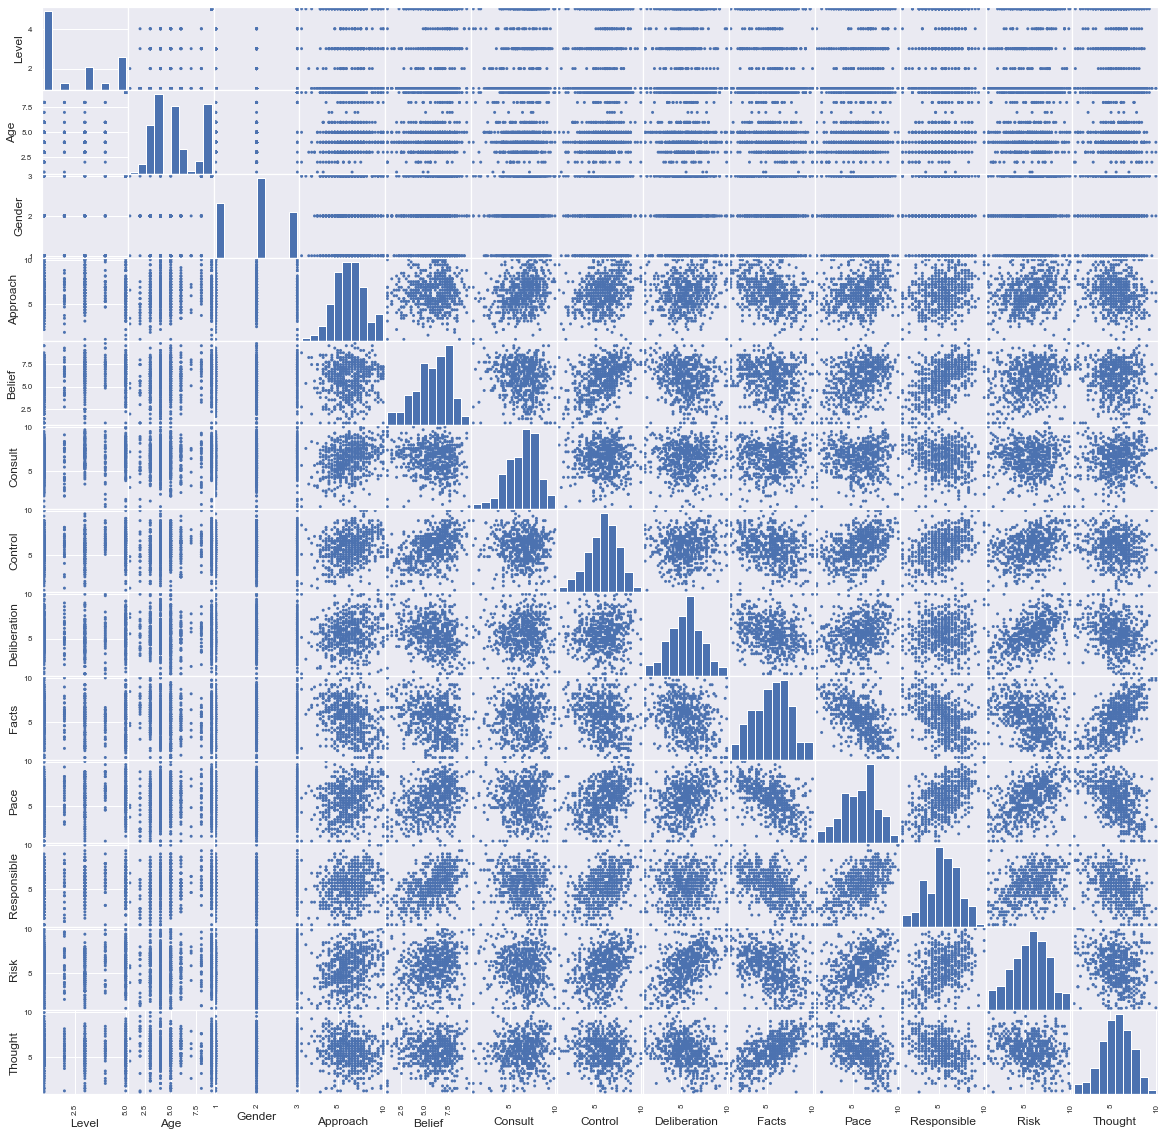

In [100]:
#Scatter Matrix
pd.plotting.scatter_matrix(df2[['Level','Age','Gender','Approach','Belief','Consult','Control','Deliberation','Facts','Pace','Responsible','Risk','Thought']],
                           alpha = 1, figsize = [20, 20])

In [101]:
#### Homoscedasticity ####

import statsmodels.formula.api as smf

#fit OLS regression models
DV_Approach = smf.ols('Approach ~ Age+Gender+Level', data=df2).fit()
DV_Belief = smf.ols('Belief ~ Age+Gender+Level', data=df2).fit()
DV_Consult = smf.ols('Consult ~ Age+Gender+Level', data=df2).fit()
DV_Control = smf.ols('Control ~ Age+Gender+Level', data=df2).fit()
DV_Deliberation = smf.ols('Deliberation ~ Age+Gender+Level', data=df2).fit()
DV_Facts = smf.ols('Facts ~ Age+Gender+Level', data=df2).fit()
DV_Pace = smf.ols('Pace ~ Age+Gender+Level', data=df2).fit()
DV_Responsible = smf.ols('Responsible ~ Age+Gender+Level', data=df2).fit()
DV_Risk = smf.ols('Risk ~ Age+Gender+Level', data=df2).fit()
DV_Thought = smf.ols('Thought ~ Age+Gender+Level', data=df2).fit()

#view model summary
print(DV_Approach.summary())

                            OLS Regression Results                            
Dep. Variable:               Approach   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.231
Date:                Wed, 20 Apr 2022   Prob (F-statistic):            0.00144
Time:                        10:26:19   Log-Likelihood:                -1170.3
No. Observations:                 595   AIC:                             2349.
Df Residuals:                     591   BIC:                             2366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2425      0.216     28.926      0.0

In [102]:
print(DV_Belief.summary())

                            OLS Regression Results                            
Dep. Variable:                 Belief   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     19.60
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           4.02e-12
Time:                        10:26:19   Log-Likelihood:                -1182.2
No. Observations:                 595   AIC:                             2372.
Df Residuals:                     591   BIC:                             2390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2890      0.220     24.023      0.0

In [103]:
print(DV_Consult.summary())

                            OLS Regression Results                            
Dep. Variable:                Consult   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.884
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           0.000146
Time:                        10:26:19   Log-Likelihood:                -1142.9
No. Observations:                 595   AIC:                             2294.
Df Residuals:                     591   BIC:                             2311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0191      0.206     29.206      0.0

In [104]:
print(DV_Control.summary())

                            OLS Regression Results                            
Dep. Variable:                Control   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     5.929
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           0.000547
Time:                        10:26:19   Log-Likelihood:                -1143.7
No. Observations:                 595   AIC:                             2295.
Df Residuals:                     591   BIC:                             2313.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4049      0.206     26.190      0.0

In [105]:
print(DV_Deliberation.summary())

                            OLS Regression Results                            
Dep. Variable:           Deliberation   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.181
Date:                Wed, 20 Apr 2022   Prob (F-statistic):              0.316
Time:                        10:26:19   Log-Likelihood:                -1196.4
No. Observations:                 595   AIC:                             2401.
Df Residuals:                     591   BIC:                             2418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2214      0.225     23.156      0.0

In [106]:
print(DV_Facts.summary())

                            OLS Regression Results                            
Dep. Variable:                  Facts   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.557
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.60e-06
Time:                        10:26:19   Log-Likelihood:                -1252.9
No. Observations:                 595   AIC:                             2514.
Df Residuals:                     591   BIC:                             2531.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8080      0.248     23.425      0.0

In [107]:
print(DV_Pace.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pace   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.455
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           4.14e-06
Time:                        10:26:19   Log-Likelihood:                -1222.3
No. Observations:                 595   AIC:                             2453.
Df Residuals:                     591   BIC:                             2470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4861      0.236     23.292      0.0

In [108]:
print(DV_Responsible.summary())

                            OLS Regression Results                            
Dep. Variable:            Responsible   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     10.43
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.07e-06
Time:                        10:26:19   Log-Likelihood:                -1177.9
No. Observations:                 595   AIC:                             2364.
Df Residuals:                     591   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2735      0.219     24.128      0.0

In [109]:
print(DV_Risk.summary())

                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.601
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           5.40e-05
Time:                        10:26:19   Log-Likelihood:                -1251.4
No. Observations:                 595   AIC:                             2511.
Df Residuals:                     591   BIC:                             2528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0207      0.247     20.301      0.0

In [110]:
print(DV_Thought.summary())

                            OLS Regression Results                            
Dep. Variable:                Thought   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.243
Date:                Wed, 20 Apr 2022   Prob (F-statistic):             0.0822
Time:                        10:26:19   Log-Likelihood:                -1152.4
No. Observations:                 595   AIC:                             2313.
Df Residuals:                     591   BIC:                             2330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6991      0.209     27.216      0.0

In [6]:
#Ignore this, not relevant for OLS regression I guess. 

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

#p value shows the data is homoscedastic.